<a href="https://colab.research.google.com/github/yulianacm/Metodos-Numericos-I/blob/main/Polinomio_lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Polinomio de interpolacion de Lagrange

In [2]:
#Importar bibliotecas
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Ingresamos los parámetros para realizar el ejercicio
xs=[1, 2, 3]
ys=[0.52, 0.61, 0.47]

In [9]:
def interpolacionl(xs, ys): #Definiremos la función para calcular el polinomio

    #Verificar que las listas tengan el mismo tamaño
    if len(xs) !=len(ys):
        raise ValueError("Las xs y ys deben tener la misma cantidad de elementos.")

    #Definir las variables para usarlas facilmente usando sympy
    x=sp.Symbol('x')
    n=len(xs)
    polinomio=0

    #Calcular el polinomio
    for i in range(n):
        L_i=1
        for j in range(n):
            if i !=j:
                L_i *=(x-xs[j])/(xs[i]-xs[j])
        polinomio +=ys[i] * L_i
    polinomio = sp.simplify(polinomio) #Simplificamos el polinomio
    return polinomio
polinomio=interpolacionl(xs, ys)
print("Polinomio de interpolación de Lagrange:") #Imprimimos el resultados
sp.pprint(polinomio)

Polinomio de interpolación de Lagrange:
         2                
- 0.115⋅x  + 0.435⋅x + 0.2


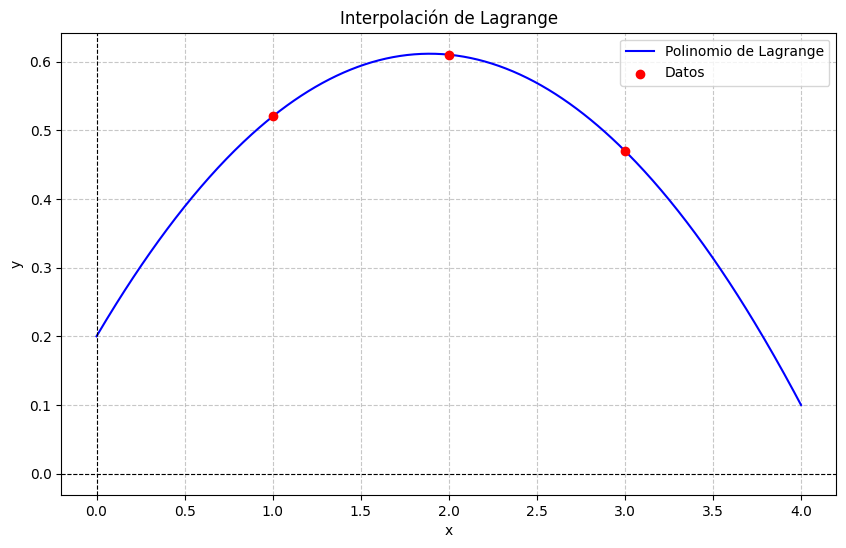

In [10]:
def grafl(xs, ys, polinomio): #Función para graficar el polinomio y los puntos

    x=sp.Symbol('x')
    polinomio_func=sp.lambdify(x, polinomio, modules=['numpy']) #Convertir el polinomio en una función

    rangox=np.linspace(min(xs) - 1, max(xs) + 1, 500)
    rangoy=polinomio_func(rangox)

    plt.figure(figsize=(10, 6))
    plt.plot(rangox, rangoy, label='Polinomio de Lagrange', color='blue')
    plt.scatter(xs, ys, color='red', label='Datos', zorder=5)

    #Detalles de la gráfica
    plt.title("Interpolación de Lagrange")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Graficar el polinomio y los puntos originales
grafl(xs, ys, polinomio)